In [105]:
from scipy.io import arff
import sklearn.cluster as sk
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import time as t

(array([(-0.1     , 0.5     , b'0'), (-0.100126, 0.510052, b'0'),
       (-0.100505, 0.520098, b'0'), (-0.101136, 0.530131, b'0'),
       (-0.10202 , 0.540145, b'0'), (-0.103154, 0.550133, b'0'),
       (-0.104539, 0.56009 , b'0'), (-0.106174, 0.570009, b'0'),
       (-0.108058, 0.579884, b'0'), (-0.110189, 0.589708, b'0'),
       (-0.112567, 0.599476, b'0'), (-0.115189, 0.609181, b'0'),
       (-0.118054, 0.618817, b'0'), (-0.121161, 0.628377, b'0'),
       (-0.124506, 0.637857, b'0'), (-0.128089, 0.64725 , b'0'),
       (-0.131907, 0.656549, b'0'), (-0.135958, 0.66575 , b'0'),
       (-0.140238, 0.674846, b'0'), (-0.144745, 0.683832, b'0'),
       (-0.149477, 0.692701, b'0'), (-0.154431, 0.701449, b'0'),
       (-0.159602, 0.71007 , b'0'), (-0.164989, 0.718558, b'0'),
       (-0.170587, 0.726908, b'0'), (-0.176393, 0.735114, b'0'),
       (-0.182404, 0.743172, b'0'), (-0.188615, 0.751077, b'0'),
       (-0.195023, 0.758822, b'0'), (-0.201624, 0.766405, b'0'),
       (-0.208413, 0.773

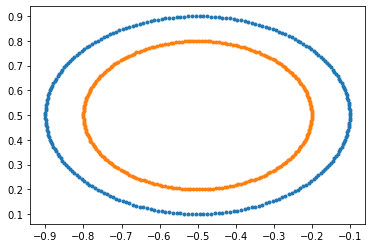

In [52]:
data = arff.loadarff(open("artificial/dartboard1.arff","r"))
print(data)

x = [data[0][i][0] for i in range(len(data[0])) if int(data[0][i][2]) == 0]
y = [data[0][i][1] for i in range(len(data[0])) if int(data[0][i][2]) == 0]

plt.plot(x,y,'.')
plt.plot(x2,y2,'.')
plt.show()

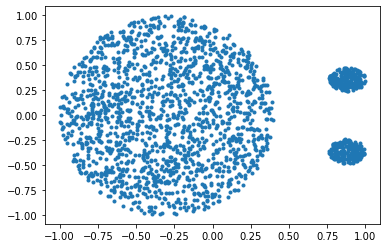

In [133]:
data = arff.loadarff(open("artificial/cure-t0-2000n-2D.arff","r"))
x = [data[0][i][0] for i in range(len(data[0]))]
y = [data[0][i][1] for i in range(len(data[0]))]

plt.plot(x,y,'.')
#plt.plot(x2,y2,'.')
plt.show()

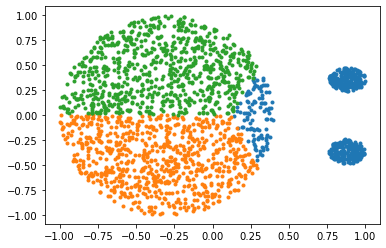

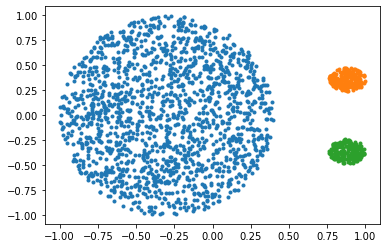

In [134]:
nb_cluster_reel = max([int(data[0][i][2]) for i in range(len(data[0]))]) + 1

data2 = [[e[0],e[1]] for e in data[0]]
kmeans = sk.KMeans(n_clusters=3, random_state=0).fit(data2)
for i in range(max(kmeans.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if kmeans.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if kmeans.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

for j in range(nb_cluster_reel):
    x = [data[0][i][0] for i in range(len(data[0])) if int(data[0][i][2]) == j]
    y = [data[0][i][1] for i in range(len(data[0])) if int(data[0][i][2]) == j]
    plt.plot(x,y,'.')
    
plt.show()

Temps écoulé :0.7439384460449219s


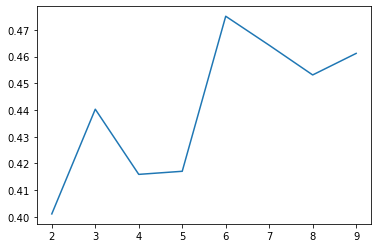

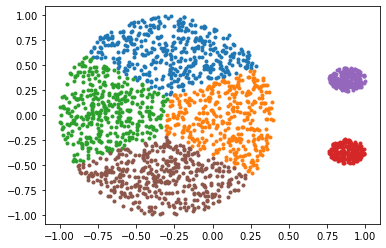

In [135]:
score = [0]*8
ti = t.time()
for nb_cluster in range(2,10):
    kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
    labels = kmeans.labels_
    score[nb_cluster - 2] = metrics.silhouette_score(data2, labels)
ti = t.time() - ti
print("Temps écoulé :" + str(ti) + "s") 
plt.plot(range(2,10),score)
plt.show()
nb_cluster = score.index(max(score)) + 2

kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
for i in range(max(kmeans.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if kmeans.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if kmeans.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

Temps écoulé :1.469982385635376s


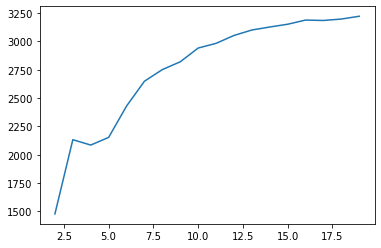

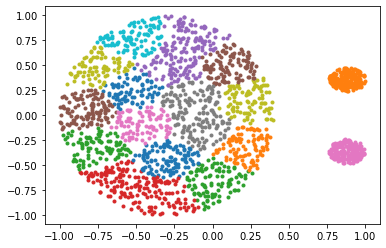

In [136]:
score = [0]*18
ti = t.time()
for nb_cluster in range(2,20):
    kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
    labels = kmeans.labels_
    score[nb_cluster - 2] = metrics.calinski_harabasz_score(data2, labels)

ti = t.time() - ti
print("Temps écoulé :" + str(ti) + "s") 
plt.plot(range(2,20),score)
plt.show()
nb_cluster = score.index(max(score)) + 2

kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
for i in range(max(kmeans.labels_) + 1):
    x = [data2[j][0] for j in range (len(data2)) if kmeans.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if kmeans.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

Temps écoulé :0.5614674091339111s


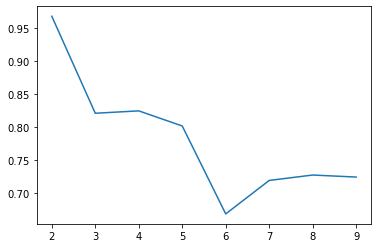

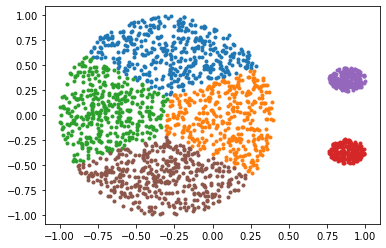

In [137]:
score = [0]*8
ti = t.time()
for nb_cluster in range(2,10):
    kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
    labels = kmeans.labels_
    score[nb_cluster - 2] = metrics.davies_bouldin_score(data2, labels)

ti = t.time() - ti
print("Temps écoulé :" + str(ti) + "s") 
plt.plot(range(2,10),score)
plt.show()
nb_cluster = score.index(min(score)) + 2

kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
for i in range(max(kmeans.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if kmeans.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if kmeans.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()